# Identifying Precise Forecasters on r/Wallstreetbets
**BrainStation Data Science Bootcamp - Capstone Project**

**Author: L Gavrilova**

**Date: 15 October 2023**

# Notebook 04 - Reddit Datatswet - EDA and Data Cleaning

## 4.0. Table of Contents


1. [Introduction](##-1.-Introduction)
    - Objective of project
    - What potential business value does this project bring?
    - How will this project help/have an impact
    
2. [Data Collection](##-2.-Data-Collection)
    - Source of the data
    - Data dictionary
    
3. [Data Wrangling](##-3---Data-Wrangling)
    - Data loading and initial checks
    - Numerical fields
    - Categorical fields. Unique values. 
    - 'Removed' records analysis
    - Checking for null values
    - Duplicates removal
        
4. [EDA - Univariate](##-4.-EDA-Univariate)
    * Distribution of rows by subreddits 
    * History of postings in 2021
    * Group by author
    * Selftext
    * Word Counts
    * Score Distribution
    * Number of comments
    * Number of crossposts
    * Pinned
5. [EDA - Bivariate analysis](##-5.-EDA---Bivariate-Analysis)
    * Correlation matrix
    * Comments and score - pairwise
    * Comments and posts counts - by date
    * Comments and posts - by author - excluding outliers
    * Comments per post and average score by author
    * Top influencers
    
6. [Conclusion](##-6.-Conclusion)

7. Cleaning and pre-processing

## 4.1. Introduction

This notebook in focused on the large dataset of unlabelled Reddit posts on financial topics.  

In this notebook I perform EDA and data cleaning of this large Reddit dataset covering calendar year 2021. 

I use this dataset as a source of unlabelled messages and for experimenting with various machine learning techniques:

1. It was used as a source of unlabelled data for Open AI labels generation (see Notebook 02)
2. I apply my models trained on the labelled dataset to a selection of posts from the large Reddit dataset to examine the output on untrained raw new data (see Notebook 05).
3. I experiment with unsupervised algorithms and perform clustering analysis of various Reddit authors (work in progress).
4. I perform backtesting of financil "predictions" of various Reddit accounts, based on the predictive models built earlier and rank the authors based on the overall quality of their financial recomemndations (work in progress).  

## 4.2. Data Collection

#### 4.2.1. Source of the dataset



https://www.kaggle.com/datasets/leukipp/reddit-finance-data

I chose this dataset as it contains the field 'author', many other datasets focused on r/Wallstreetbets have that column removed.  The data covers period between Jan to Dec 2021. 

Instructions on downloading the dataset from kaggle:

1. Unzip the file.
2. There is one common folder named. It contains 14 subfolders, one for each subreddit. 
3. Each subfolder is named according to the subreddit it represents. Each subfolder contains two files.
4. Collect all .cvs files in one directory and concatenate them vertically. A new column is added in the process with the name of the subreddit. 

#### 4.2.2. Data dictionary

| Column Name            |   Data Type        |  Description                     |
|:----------------------:|:------------------:|----------------------------------|
|           id          |              string             |      The id of the submission        |
|    author   | (string)   | The redditors username  |
|    created   | (datetime)  |  Time the submission was created.
|    retrieved  |  (datetime  |  Time the submission was retrieved. |
|    edited  |  (datetime)  | Time the submission was modified. |
|    pinned   | (integer)  |  Whether or not the submission is pinned. |
|    archived   | (integer)  |  Whether or not the submission is archived.
|    locked   | (integer)  |  Whether or not the submission is locked.
|    removed  |  (integer)  |  Whether or not the submission is mod removed.
|    deleted  |  (integer)  |  Whether or not the submission is user deleted.
|    is_self   | (integer)  |  Whether or not the submission is a text.
|    is_video  |  (integer)  |  Whether or not the submission is a video.
|    is_original_content   | (integer)  |  Whether or not the submission has been set as original content.
|    title   | (string)  |  The title of the submission.
|    link_flair_text   | (string)  |  The submission link flairs text content.
|    upvote_ratio   | (number)  |  The percentage of upvotes from all votes on the submission.
|    score   | (integer)  |    The number of upvotes for the submission. |
|    gilded   | (integer)  |  The number of gilded awards on the submission.
|    total_awards_received  |  (integer)  |  The number of awards on the submission.
|    num_comments   | (integer)  |  The number of comments on the submission.
|    num_crossposts   | (integer)  |  The number of crossposts on the submission.
|    selftext   | (string)  |  The submission selftext on text posts.
|    thumbnail   |  (string)  |  The submission thumbnail on image posts.
|    shortlink    | (string)  |  The submission short url.

## 4.3. Data Wrangling

### 4.3.1. Data Loading

In [16]:
# Importing several libraries
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (6.0, 4.0) #setting figure size
import seaborn as sns
import matplotlib.dates as mdates
import os
import emoji
import re

# Set visualization and pandas display options
plt.rcParams['figure.figsize'] = (6.0, 4.0)
plt.style.use('ggplot')
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_colwidth', None)

# Set the global font to be used for all text
plt.rcParams['font.family'] = 'Gill Sans'  

In [17]:
DATAFILE = '../data/merged_data.csv'

In [18]:
df = pd.read_csv(DATAFILE)

/var/folders/j6/lnskfknd3zz28plgqdh6w_4m0000gn/T/ipykernel_99127/2709059952.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(DATAFILE)


In [19]:
# determine the shape of the database:
df.shape

(1500797, 25)

In [20]:
df.head(1).T

,0
id,ko4pii
author,[deleted]
created,2021-01-01 04:08:51
retrieved,2021-02-28 16:51:20
edited,1970-01-01 00:00:00
pinned,0
archived,0
locked,0
removed,1
deleted,1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500797 entries, 0 to 1500796
Data columns (total 25 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   id                     1500797 non-null  object 
 1   author                 1500797 non-null  object 
 2   created                1500797 non-null  object 
 3   retrieved              1500797 non-null  object 
 4   edited                 1500797 non-null  object 
 5   pinned                 1500797 non-null  int64  
 6   archived               1500797 non-null  int64  
 7   locked                 1500797 non-null  int64  
 8   removed                1500797 non-null  int64  
 9   deleted                1500797 non-null  int64  
 10  is_self                1500797 non-null  int64  
 11  is_video               1500797 non-null  int64  
 12  is_original_content    1500797 non-null  int64  
 13  title                  1500792 non-null  object 
 14  link_flair_text   

Most columns have non-null values.  Only link_flair_text will require filling in. 

All columns have the expected datatype, other than the date ('created'), so I will convert it into the datetime format:

In [22]:
# sample of rows showing only non-numerical columns
df.select_dtypes('object').sample(2)

,id,author,created,retrieved,edited,title,link_flair_text,selftext,thumbnail,shortlink,FolderName
882603,l8918g,[deleted],2021-01-30 00:25:29,2021-02-04 22:41:14,1970-01-01 00:00:00,$17k -> 125k You guys have changed my life. I’m still team GME. 🚀 🚀 Squeeze those shorts dry,Gain,[deleted],default,https://redd.it/l8918g,wallstreetbets
462657,plr8r5,Mr21guy-yt,2021-09-10 18:55:30,2021-09-10 23:27:00,1970-01-01 00:00:00,Hi I’m new to investing is anyone able to message me and give me tips and how things work in the investing world?,Advice Request,[removed],self,https://redd.it/plr8r5,stocks


In [23]:
# Convert the date column from 'object' datatype into a 'datetime' datatype:
df['created'] = pd.to_datetime(df['created'])

In [24]:
# I also convert 'title' and 'selftext' into strings:
df['title'] = df['title'].astype(str)
df['selftext'] = df['selftext'].astype(str)

In [25]:
# Drop columns that have no interest for my analysis
columns_to_drop = ['is_original_content', 'thumbnail', 'retrieved', 'edited', 'archived', 'locked']
df = df.drop(columns=columns_to_drop)

### 4.3.2. Numerical fields

In [26]:
# Describe the numerical fields
df.describe().T

,count,mean,min,25%,50%,75%,max,std
created,1500797,2021-04-26 16:23:55.459887616,2021-01-01 00:02:06,2021-01-30 15:48:55,2021-03-17 14:36:21,2021-06-29 02:32:34,2021-12-31 23:59:44,NaN
pinned,1500797.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
removed,1500797.00,0.67,0.00,0.00,1.00,1.00,1.00,0.47
deleted,1500797.00,0.09,0.00,0.00,0.00,0.00,1.00,0.29
is_self,1500797.00,0.64,0.00,0.00,1.00,1.00,1.00,0.48
is_video,1500797.00,0.02,0.00,0.00,0.00,0.00,1.00,0.14
upvote_ratio,1500797.00,0.89,0.00,0.84,1.00,1.00,1.00,0.19
score,1500797.00,84.60,0.00,1.00,1.00,6.00,299489.00,1638.56
gilded,1500797.00,0.01,0.00,0.00,0.00,0.00,292.00,0.39
total_awards_received,1500797.00,0.50,0.00,0.00,0.00,0.00,11491.00,19.80


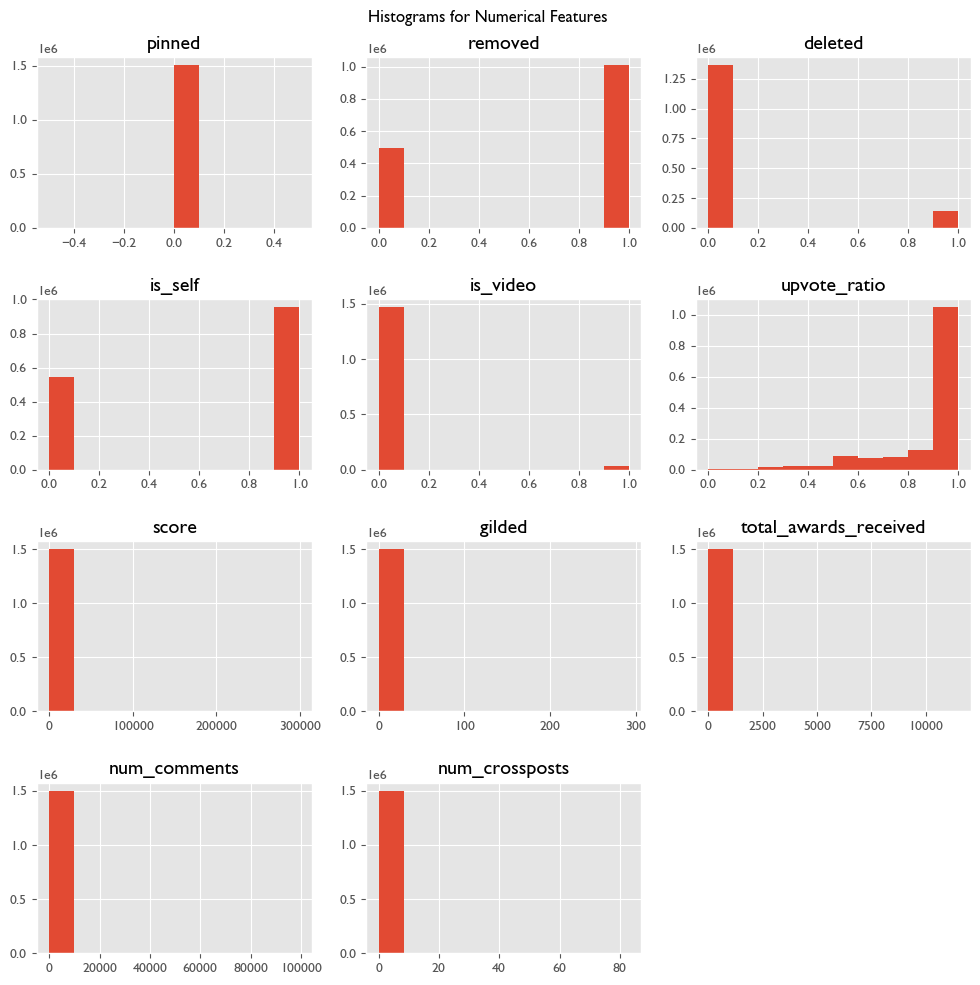

In [27]:
# Histograms for all numerical features:

df.select_dtypes(include=['int64', 'float64']).hist(figsize=(10,10))
plt.suptitle("Histograms for Numerical Features") 
# the suptitle places a centralized title above all the subplots. 
plt.tight_layout()
plt.show()

Observations: 
1. Score (the number of upvotes/likes): maximum value is 299489. Average is 84.  Very skewed distribution. 
2. Total awards received: max value = 11491, average 0.49, mean = 0.  Also very skewed distribution. 
3. Number of comments: max = 99346, mean = 18. Most posts have very low number of comments, but a small minority of them generates enormous number of comments. 
4. Deleted: 9.3% of records were subsequently deleted by the author (but we still have the text)
5. Removed: 67% of the records were removed by the moderators. This is a very high number.
6. ‘is_video’: 2% of records had video attached.
7. Upvote ratio: 89% of posts had more positive votes than negative, as most of them are >0.5.  A small minority of messages have rating <0.5 (more negatives than positives)

Overall, the data is very unevenly distributed with just a few posts receiving most of the attention (by number of comments, number of cross posts, score and awards received). We should look into these top performers separately and maybe flag them as a special category.


### 4.3.3. Categorical fields. Unique values

In [28]:
# Performing a .describe on the non-numeric columns
df.describe(include= 'object').T

,count,unique,top,freq
id,1500797,1500797,ko4pii,1
author,1500797,596401,[deleted],218784
title,1500797,1350669,AMC,1444
link_flair_text,1312512,372,Discussion,307477
selftext,1500797,303241,[removed],596869
shortlink,1500797,1500797,https://redd.it/ko4pii,1
FolderName,1500797,14,wallstreetbets,775326


In [29]:
# Value counts for all categorical fields:
print("\nValue counts for categorical fields:")
for column in df.select_dtypes(include=['object']).columns:
    print(f"\nValue counts for {column}:")
    print(df[column].value_counts())


Value counts for categorical fields:

Value counts for id:
id
ko4pii    1
ljh86e    1
ljh6zj    1
ljh6ww    1
ljh6t7    1
         ..
p0nzul    1
p0n40f    1
p0mgte    1
p0krvm    1
rt6lul    1
Name: count, Length: 1500797, dtype: int64

Value counts for author:
author
[deleted]              218784
AutoModerator            2581
fintechinshorts          1090
Onboarding92              785
nmstanley32               642
                        ...  
Delicious-Dog7349           1
Semi-proletariat            1
TheBuilder16                1
Qwal77                      1
coyote_of_the_month         1
Name: count, Length: 596401, dtype: int64

Value counts for title:
title
AMC                                                                               1444
GME                                                                                923
Dogecoin                                                                           671
SNDL                                                             

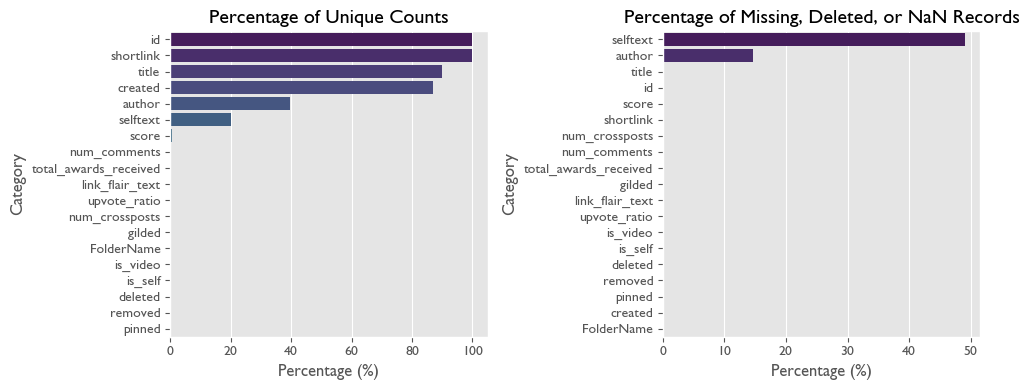

In [30]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot 1: Percentage of Unique Counts for Each Categorical Value
unique_counts = df.nunique()
percentage_unique = (unique_counts / len(df)) * 100
percentage_unique = percentage_unique.sort_values(ascending=False)
sns.barplot(ax=axes[0], x=percentage_unique.values, y=percentage_unique.index, palette="viridis")
axes[0].set_title("Percentage of Unique Counts")
axes[0].set_xlabel("Percentage (%)")
axes[0].set_ylabel("Category")

# Plot 2: Percentage of Missing, Deleted, or NaN Records
missing_deleted_nan = df.isin(["[removed]", "[deleted]", "NaN"]).sum() / len(df) * 100
missing_deleted_nan = missing_deleted_nan.sort_values(ascending=False)
sns.barplot(ax=axes[1], x=missing_deleted_nan.values, y=missing_deleted_nan.index, palette="viridis")
axes[1].set_title("Percentage of Missing, Deleted, or NaN Records")
axes[1].set_xlabel("Percentage (%)")
axes[1].set_ylabel("Category")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

In [31]:
# Lets look at the number of unique values in our object columns
for column_name in df.columns:
    unique_values = len(df[column_name].unique())
    print("Feature '{column_name}' has '{unique_values}' unique values".format(column_name = column_name, unique_values=unique_values))

Feature 'id' has '1500797' unique values
Feature 'author' has '596401' unique values
Feature 'created' has '1305521' unique values
Feature 'pinned' has '1' unique values
Feature 'removed' has '2' unique values
Feature 'deleted' has '2' unique values
Feature 'is_self' has '2' unique values
Feature 'is_video' has '2' unique values
Feature 'title' has '1350669' unique values
Feature 'link_flair_text' has '373' unique values
Feature 'upvote_ratio' has '101' unique values
Feature 'score' has '7473' unique values
Feature 'gilded' has '45' unique values
Feature 'total_awards_received' has '540' unique values
Feature 'num_comments' has '2555' unique values
Feature 'num_crossposts' has '58' unique values
Feature 'selftext' has '303241' unique values
Feature 'shortlink' has '1500797' unique values
Feature 'FolderName' has '14' unique values


* **Author**: This is the most important field in our study, as we focus on each account's track record. We have 596k unique authors, i.e. 2.1 posts per non-deleted author. Some authors deleted their accounts before the information was scraped into the dataset (219k), so we don’t have their names (15% of total records).  However, it would be unwise to delete such records, as arguments and sentiment expressed by such authors who chose to remove their accounts at a later stage did affect other participants. Moreover, their posts will still be useful in our NLP modelling, so we should keep them and treat it as a separate very prolific author that prefers to stay anonymous.  Maybe there are reasons for that, we shall see later in the study.  

* **Self-text**.  This is a very important field for further NLP analysis of the text.  We have a problem here, as the field selftext is often missing or has no meaningful value. 597k of such fields have been removed by the moderators.   **Only 21% of all rows (297k ) have long form meaningful text** that can be analysed.  This is disappointing, much less than the size of the dataset, but still acceptable. 

* **Title**: On the other hand, the title of the text contains some useful information, too.  It might be short, maybe just one sentence, but it may clearly indicate sentiment or attitude. All of our 1.5m records do have such non-null rows, and 1.35m of them are unique. 


Let's look at the authors with the highest score:

In [32]:
df.sort_values(by='score').tail(5).T

,880623,712961,872847,780553,711840
id,l881ia,l6x130,l846a1,l78uct,l6wu59
author,keenfeed,does-it-mater,DeepFuckingValue,DeepFuckingValue,vrweensy
created,2021-01-29 23:40:59,2021-01-28 13:49:11,2021-01-29 21:04:45,2021-01-28 21:06:23,2021-01-28 13:40:34
pinned,0,0,0,0,0
removed,0,0,0,0,0
deleted,0,0,0,0,0
is_self,0,1,0,0,0
is_video,0,0,0,0,0
title,It’s treason then,"CLASS ACTION AGAINST ROBINHOOD. Allowing people to only sell is the definition of market manipulation. A class action must be started, Robinhood has made plenty of money off selling info about our trades to the hedge funds to be able to pay out a little for causing people to loose money now",GME YOLO month-end update — Jan 2021,GME YOLO update — Jan 28 2021,UPVOTE so everyone sees we got SUPPORT
link_flair_text,Meme,Discussion,YOLO,YOLO,News


Now I will look at the length of text in various columns with text, and look at the distribution of the length of the posts:

In [33]:
# Creating 2 new columns with word counts that will calculate the total number of words in columns "selftext" and "title"
df['word_count_selftext'] = df['selftext'].str.split().str.len()
df['word_count_title'] = df['title'].str.split().str.len()

In [34]:
# Having a look at the distribution of word counts in SELFTEXT column:
df['word_count_selftext'].value_counts()
# df['word_count_selftext'].mean()

word_count_selftext
1       1193828
2          3347
3          3011
4          2295
5          2132
         ...   
4151          1
1507          1
2607          1
2841          1
2114          1
Name: count, Length: 2849, dtype: int64

Observation: 

The longest posts have length of words between 2000-3000 words per post. However, a majority of posts have only one word (1,193,828 posts!). Such words mostly include [deleted], [removed[, [nan], [NaN]. This is not very informative, unless the sentiment is expressed in other fields, such as the "title" or flair" fields. 

In [35]:
# Having a look at the distribution of word counts in the TITLE column:
df['word_count_title'].value_counts()
#df['word_count_title'].median()
#df['word_count_title'].mean()

word_count_title
4      134115
5      132113
6      121548
3      116921
7      109902
        ...  
85          1
82          1
86          1
112         1
143         1
Name: count, Length: 87, dtype: int64

The title field is short, but important indicator of sentiment. There are many more rows with a meaningful text in that field, as we have seen before. The average length of the title field is 10 words. The majority of the post titles are very short, 4-7 words, but there are longer titles, up to 143 words in length. 

### 4.3.4. 'Removed' records analysis

A huge percentage of the original posts (1 million) have been removed by the moderators = 2/3 of the starting total! Let's look closer at the removed posts. They have '1' in the column 'removed'. Maybe there was a good reason why they have been removed? 

In [36]:
df_removed = df[df['removed'] == 1]
df_removed.describe().T

,count,mean,min,25%,50%,75%,max,std
created,1007815,2021-04-19 23:33:52.577509888,2021-01-01 00:02:06,2021-01-29 11:49:28,2021-03-08 20:24:04,2021-06-25 00:17:05,2021-12-31 23:59:44,NaN
pinned,1007815.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
removed,1007815.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00
deleted,1007815.00,0.14,0.00,0.00,0.00,0.00,1.00,0.35
is_self,1007815.00,0.63,0.00,0.00,1.00,1.00,1.00,0.48
is_video,1007815.00,0.02,0.00,0.00,0.00,0.00,1.00,0.14
upvote_ratio,1007815.00,0.93,0.01,1.00,1.00,1.00,1.00,0.17
score,1007815.00,19.65,0.00,1.00,1.00,1.00,167742.00,686.56
gilded,1007815.00,0.00,0.00,0.00,0.00,0.00,32.00,0.10
total_awards_received,1007815.00,0.10,0.00,0.00,0.00,0.00,1108.00,3.68


Most of the rows flagged as 'removed' (>75%) have no values for 'selftext' - they typically have only one word 'removed' in that field. However, the word count for ‘title’ is still present, with an average title length of 7 words, this is a field that we may still use for our textual analysis to determine sentiment. I decided to keep the rows tagged 'removed’ in the dataset.

It will be interesting to understand what makes a post likely to be deleted by the moderators. We have a huge number of observations (1 million), so we can draw some inferences from that. It is quite likely that the quality of comments in such rows was low, spamming the air.  Some of the records I manually reviewed talk about unrelated issues (such as student debt troubles, property transactions, venting out emotions, etc.) and it is understandable that moderators chose to remove such posts.  However, these rows also include some relevant comments on the market, and maybe it was the moderators’ subjectivity that played a role here. Interestingly, some very highly commented posts have been removed (one of the posts received 35k comments yet has been moderated out).

We can run a logistical regression on this field to see if we can determine what attributes of a post make it more likely to be deleted. 

### 4.3.5. Checking for null values

In [37]:
# summing all null values in the whole dataset
df.isna().sum()

id                            0
author                        0
created                       0
pinned                        0
removed                       0
deleted                       0
is_self                       0
is_video                      0
title                         0
link_flair_text          188285
upvote_ratio                  0
score                         0
gilded                        0
total_awards_received         0
num_comments                  0
num_crossposts                0
selftext                      0
shortlink                     0
FolderName                    0
word_count_selftext           0
word_count_title              0
dtype: int64

Observation: some authors chose to leave their posts uncategorised, i.e link_flair_text = NULL.  We should fill in those rows to remove NULL values:

In [38]:
# Replace NULL values with "none"
df['link_flair_text'].fillna("none", inplace=True)

### 4.3.6. Duplicates removal

In [39]:
# Check for duplicate rows:
dupl=df.duplicated().sum()
print(f"The duplicates are {dupl:.2f}% of total rows")

The duplicates are 0.00% of total rows


On the first look it all seems ok, no duplicated rows. However, under the hood, there are some duplicates as I show below. 

Let's look at rows where the title of the post is identical and the author is identical, too.  This filter is designed to catch all those accounts that reposted identical content several times, on different dates or in different channels:

In [40]:
# Filtering rows that have the same title and the same author:
author_title_dup = df.duplicated(subset=['author', 'title']).value_counts().T
author_title_dup

False    1438762
True       62035
Name: count, dtype: int64

So, we have 62k rows with where the author and the title are identical. Some of them will need to be removed. Let's see what's inside these rows:

In [41]:
df[df.duplicated(subset=['author', 'title'], keep=False)].sort_values(by='title').head(2)

,id,author,created,pinned,removed,deleted,is_self,is_video,title,link_flair_text,...,score,gilded,total_awards_received,num_comments,num_crossposts,selftext,shortlink,FolderName,word_count_selftext,word_count_title
29420,lqwut7,[deleted],2021-02-23 23:44:33,0,1,1,1,0,!,💎🙌,...,2,0,0,2,0,[deleted],https://redd.it/lqwut7,gme,1,1
624957,l33h2p,[deleted],2021-01-23 02:47:00,0,1,1,0,0,!,Meme,...,1,0,0,0,0,[deleted],https://redd.it/l33h2p,wallstreetbets,1,1


In [42]:
# Calculating % of rows that are duplicate FOR TITLE:
author_title_dup_percentage = author_title_dup[1] / df.shape[0] * 100
print(f"The duplicate rows by title and author are {author_title_dup_percentage:.2f}% of total rows")

The duplicate rows by title and author are 4.13% of total rows


There are 62,035 duplicate posts by title. Most of them have **exactly the same content**, but have been posted to several different subreddits by certain energetic redditors. For example, a user "Wallstreetdrive" posted exactly the same title on the stock ticker SNDL on 7 April 2021 at 21:46:35, 21:52:37, 21:53:29 and 21:57:26, i.e. four identical posts within 11 minutes, all in different subreddits.  Although such duplicates certanly signal certain strength of emotions and sentiment, they dont carry additional signal for our ML study, as the text is exactly the same, the date is the same, and the author is the same. If some authors choose to spam the channel 3-4x times more energetically than the others it does not mean we should assign higher weight to their signal.  

Therefore, I dropped all but first instances of the duplicate columns contained in this filter:

In [43]:
# Removing duplicates based on 'author' and 'title' columns
# Create a boolean to identify duplicates, keeping the first instance
dupl = df.duplicated(subset=['author', 'title'], keep='first')

# Invert the boolean to select the rows that are not duplicates
df = df[~dupl]

# Reset the index of the filtered DataFrame
df.reset_index(drop=True, inplace=True)

In [44]:
# Performing similar analysis for a combination of 'author' and 'selftext':
author_selftext_dup = df.duplicated(subset=['selftext', 'title']).value_counts().T
author_selftext_dup

False    1380137
True       58625
Name: count, dtype: int64

In [45]:
df[df.duplicated(subset=['selftext', 'title'], keep=False)].sort_values(by='title').head(2)

,id,author,created,pinned,removed,deleted,is_self,is_video,title,link_flair_text,...,score,gilded,total_awards_received,num_comments,num_crossposts,selftext,shortlink,FolderName,word_count_selftext,word_count_title
471213,lc49gm,HStG_0627,2021-02-04 01:41:03,0,1,0,1,0,!,none,...,1,0,0,0,0,[removed],https://redd.it/lc49gm,robinhoodpennystocks,1,1
171052,mnjcrc,Same-Tour9465,2021-04-09 15:13:23,0,0,0,0,0,!,Knowledge,...,38,0,0,1,0,nan,https://redd.it/mnjcrc,gme,1,1


In [46]:
# Calculating % of rows that are duplicate for SELFTEXT:
author_selftext_dup_percentage = author_selftext_dup[1] / df.shape[0] * 100
print(f"The duplicate rows by title and author are {author_selftext_dup_percentage:.2f}% of total cleaned remaining rows")


The duplicate rows by title and author are 4.07% of total cleaned remaining rows


Again, I see duplicate posts here, identical title and the same date, they might be posted by various accounts, but all within a short period of time.  For example, a message with the following content was posted 3 times on 28 Jan 2021 at 14:13:10, 15:09:25 and 15:17:58:

"!!! CHAMATH, Please open your own trading platform & I guarantee all of us that just got screwed over by RH & other trading platforms that are manipulating the market today will come aboard!🙏"

Two of these were posted to wsb subreddit, and one more at the r/stockmarket. The accounts that posted this **have different authors**, but given that they have been posted on the same day with identical message indicates presence of a bot or a coordinated spamming or influencing campaign.  

I decided to delete such rows duplicate, keeping only first instance, as they only create noise.

In [47]:
#I am removing duplicates based on 'selftext', 'title' and 'date' columns.

# In order to remove posts that were posted on the same date but at different time I need to create a new column "Date" (without timestamp):
df['date'] = pd.to_datetime(df['created']).dt.date

# Convert the "Date" column back to datetime format
df['date'] = pd.to_datetime(df['date'])

# Sort the DataFrame by 'comments' column in descending order
df.sort_values(by='num_comments', ascending=False, inplace=True)

# Drop duplicates based on 'selftext', 'title', and 'date', keeping the first (highest comments) instance
df.drop_duplicates(subset=['selftext', 'title', 'date'], keep='first', inplace=True)

# Reset the index of the DataFrame
df.reset_index(drop=True, inplace=True)

In [48]:
# df.info()

I have 1.41m rows left after deleting the duplicates.  This is still a good number. 

## 4.4. EDA Univariate

In [49]:
cont_var=list(df.select_dtypes(exclude='object'))
cont_var

['created',
 'pinned',
 'removed',
 'deleted',
 'is_self',
 'is_video',
 'upvote_ratio',
 'score',
 'gilded',
 'total_awards_received',
 'num_comments',
 'num_crossposts',
 'word_count_selftext',
 'word_count_title',
 'date']

### 4.4.1. Distribution of rows by subreddits

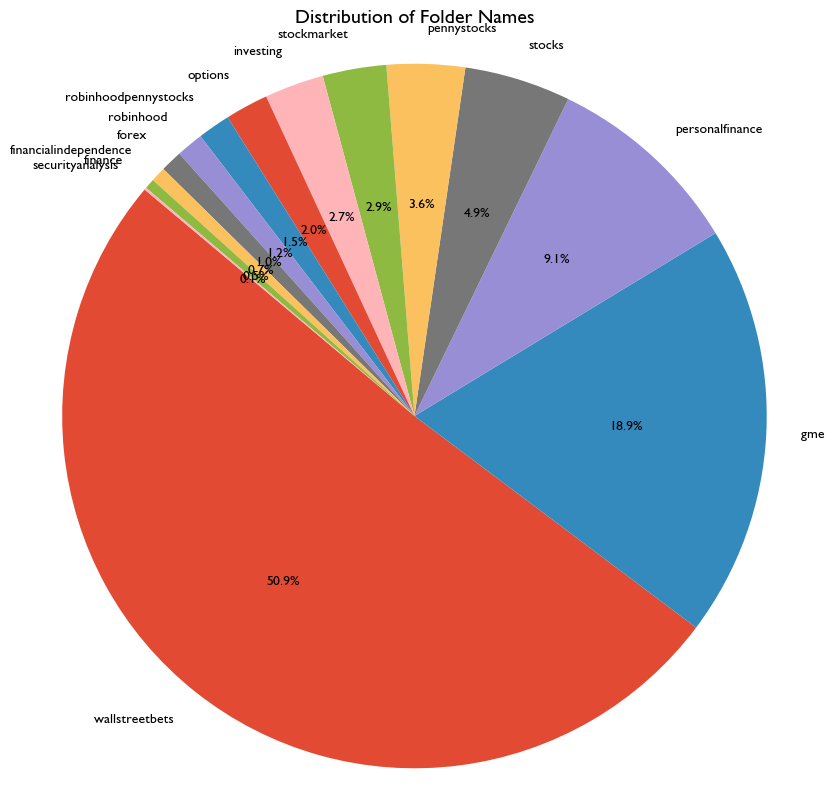

In [50]:
# Create a chart with distribution of rows by subreddits in a shape of a pie chart

# Calculate the value counts for 'FolderName' column
folder_counts = df['FolderName'].value_counts()

# Create a pie chart
plt.figure(figsize=(10, 10))
plt.pie(folder_counts, labels=folder_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Folder Names')
plt.show()

Observation:  

Most of my dataset (51% of cleaned records) comes from r/wallstreetbets subreddit. There are some other finance related subreddits included in the dataset (30% of total, split between 12 different small subreddits).  I decided to keep these records, as they may also contain authors that made forecasts and their performance can be analysed and measured.  Moreover, the diversity of posts and writing styles is good for training our NLP models.  

Some redditors organised themselves into a separate subreddit r/gme, but they discussed roughly the same topics, and there is an overlap in authorship. 


In [51]:
# Get unique authors for each category
gme_authors = set(df[df['FolderName'] == 'gme']['author'].unique())
wallstreetbets_authors = set(df[df['FolderName'] == 'wallstreetbets']['author'].unique())

print(f"Number of unique GME authors is {len(gme_authors)}")
print(f"Number of unique WSB authors is {len(wallstreetbets_authors)}")

# Identify authors who have contributed to both categories
common_authors = gme_authors.intersection(wallstreetbets_authors)
pct_both=len(common_authors) / len(gme_authors) *100
print(f"Number of authors that contributed to both subreddits: {len(common_authors)}, or {pct_both:.2f}% of GME unique authors")

Number of unique GME authors is 58704
Number of unique WSB authors is 360045
Number of authors that contributed to both subreddits: 16692, or 28.43% of GME unique authors


### 4.4.2. Group by Date

In [52]:
# Group by the 'Date' column and aggregate columns
df_agg_by_date = df.groupby([df['created'].dt.date]).agg({
    'id':'count', 
    'score': 'mean',
    'num_comments':'sum',
    'word_count_selftext':'mean',
    'word_count_title':'mean',
    'removed':'sum',
    'deleted':'sum',
    'is_video':'sum'

}).reset_index().rename(columns={
    'id': 'total_count',
    'score': 'average_score',
    'num_comments': 'total_comments',
    'word_count_selftext':'av_word_count_selftext',
    'word_count_title':'av_count_title',
    'removed':'sum_removed',
    'deleted':'sum_deleted',
    'is_video':'sum_video'
})

In [53]:
df_agg_by_date.head(5)

,created,total_count,average_score,total_comments,av_word_count_selftext,av_count_title,sum_removed,sum_deleted,sum_video
0,2021-01-01,1024,80.11,48557,36.97,9.68,715,197,25
1,2021-01-02,1163,91.07,19973,49.75,8.79,840,183,28
2,2021-01-03,1048,118.34,33696,54.68,8.62,749,160,23
3,2021-01-04,1981,60.25,42431,31.92,8.67,1473,312,53
4,2021-01-05,2015,51.32,46524,32.96,8.68,1422,313,47


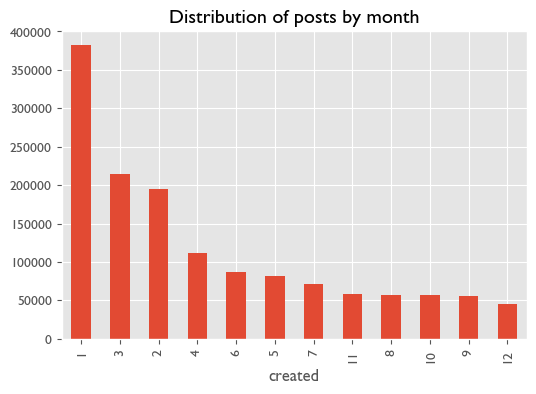

In [54]:
# Plot of post counts grouped by MONTH

plt.figure(figsize=(5, 5))
df['created'].dt.month.value_counts().plot(kind='bar', figsize=(6,4))
plt.title('Distribution of posts by month')
plt.show()

Most postings happened in January 2021, but also in Februray and March. The rest of the year was much less active. 

### 4.4.3. History of postings in 2021

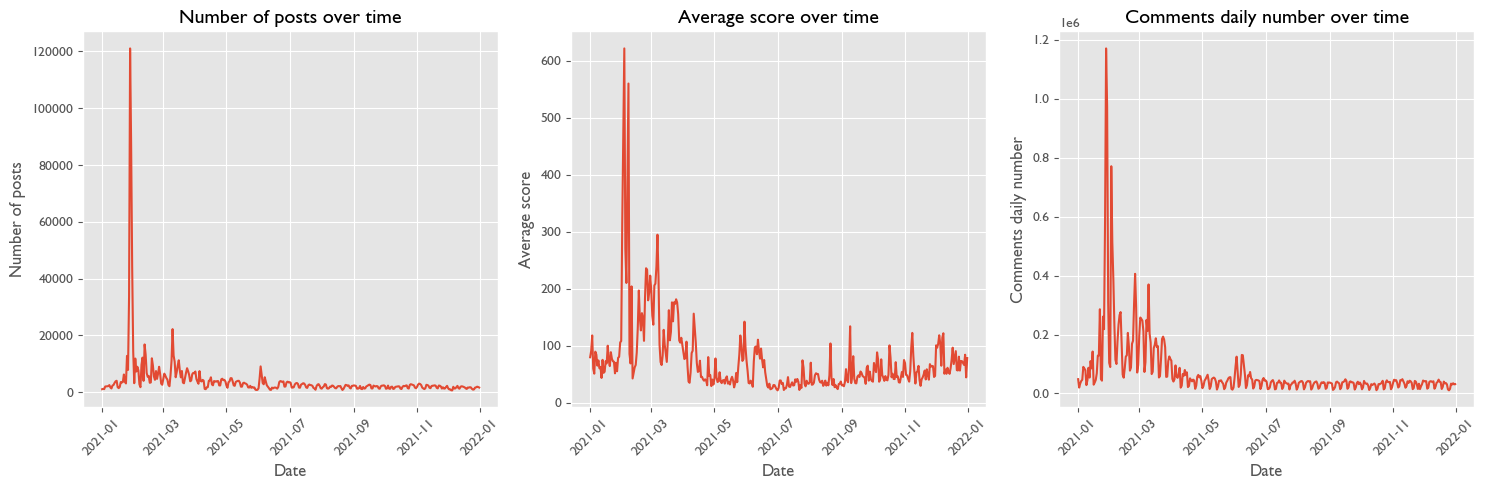

In [55]:
# Create a figure and a 1x3 subplot layout. ax is a list of AxesSubplots.
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].plot(df_agg_by_date['created'], df_agg_by_date['total_count'])
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Number of posts')
ax[0].tick_params(axis='x', rotation=45)
ax[0].set_title('Number of posts over time')

ax[1].plot(df_agg_by_date['created'], df_agg_by_date['average_score'])
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Average score')
ax[1].tick_params(axis='x', rotation=45)
ax[1].set_title('Average score over time')

ax[2].plot(df_agg_by_date['created'], df_agg_by_date['total_comments'])
ax[2].set_xlabel('Date')
ax[2].set_ylabel('Comments daily number')
ax[2].tick_params(axis='x', rotation=45)
ax[2].set_title('Comments daily number over time')

plt.tight_layout()
plt.show()


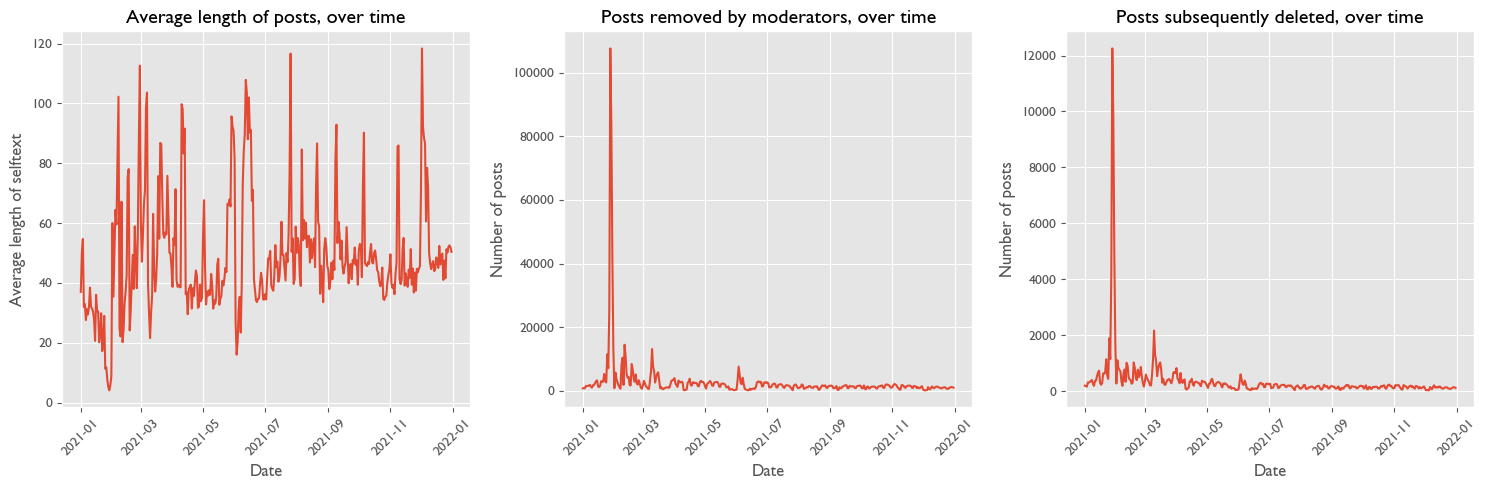

In [56]:
# Create a figure and a 1x3 subplot layout. ax is a list of AxesSubplots.
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].plot(df_agg_by_date['created'], df_agg_by_date['av_word_count_selftext'])
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Average length of selftext')
ax[0].tick_params(axis='x', rotation=45)
ax[0].set_title('Average length of posts, over time')

ax[1].plot(df_agg_by_date['created'], df_agg_by_date['sum_removed'])
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Number of posts')
ax[1].tick_params(axis='x', rotation=45)
ax[1].set_title('Posts removed by moderators, over time')

ax[2].plot(df_agg_by_date['created'], df_agg_by_date['sum_deleted'])
ax[2].set_xlabel('Date')
ax[2].set_ylabel('Number of posts')
ax[2].tick_params(axis='x', rotation=45)
ax[2].set_title('Posts subsequently deleted, over time')

plt.tight_layout()
plt.show()


In [57]:
# Select the top 20 dates with the highest number of posts
top_20_dates_df = df_agg_by_date.sort_values(by='created', ascending=True).nlargest(20, 'total_count')
top_20_dates_df.reset_index(drop=True, inplace=True)

# Sort the top_20_dates_df by 'created' in ascending order
top_20_dates_df_sorted = top_20_dates_df.sort_values(by='created', ascending=True)
print("Top 20 Dates with the Highest Number of Posts (Ordered by Date):")
top_20_dates_df_sorted


Top 20 Dates with the Highest Number of Posts (Ordered by Date):


,created,total_count,average_score,total_comments,av_word_count_selftext,av_count_title,sum_removed,sum_deleted,sum_video
9,2021-01-25,12759,51.90,260659,11.30,8.96,11440,1888,89
3,2021-01-27,33649,55.55,586929,7.70,11.79,25125,4124,110
0,2021-01-28,121079,79.14,1170079,5.10,9.55,107694,12255,629
1,2021-01-29,87139,80.82,972485,4.07,9.32,84121,9739,946
2,2021-01-30,44084,106.01,309345,5.84,9.70,42346,4837,500
6,2021-01-31,14274,108.61,103890,8.87,9.45,13046,1593,207
12,2021-02-02,11827,466.57,770629,35.36,10.76,5696,1105,80
16,2021-02-08,9647,85.96,176070,24.77,8.81,8188,627,62
10,2021-02-09,12159,69.26,233404,22.09,8.76,10376,772,69
5,2021-02-11,16798,42.87,276091,20.18,8.68,14444,1017,66


In [58]:
total_count_sum = top_20_dates_df['total_count'].sum()
total_count_percentage = (top_20_dates_df['total_count'].sum() / len(df)) * 100
print(f'Total count of posts on 20 most active days is {total_count_sum} which is {total_count_percentage} percent of the total for the year 2021. \nThe period between 25 Jan and 15 March 2021 was the busiest.')

Total count of posts on 20 most active days is 484521 which is 34.19498128355832 percent of the total for the year 2021. 
The period between 25 Jan and 15 March 2021 was the busiest.


There was an abnormal spike in activity in late January 2021 which lasted for a short period of time. The number of posts was particularly high in a short period covering end of Jan 2021 to early February 2021.  If early January the avearge number of posts was approximately 1000-2000 per day, in the peak day Jan 28, 2021 the number of posts exceeded 130 thousands.  That was a truly anbnormal day.   

The activity and engagement (average score) remained elevated until the end of April 2021, and fully normalised in May 2021. We should keep in mind that that period in Q1'21 was very abnormal and consider it carefully. 

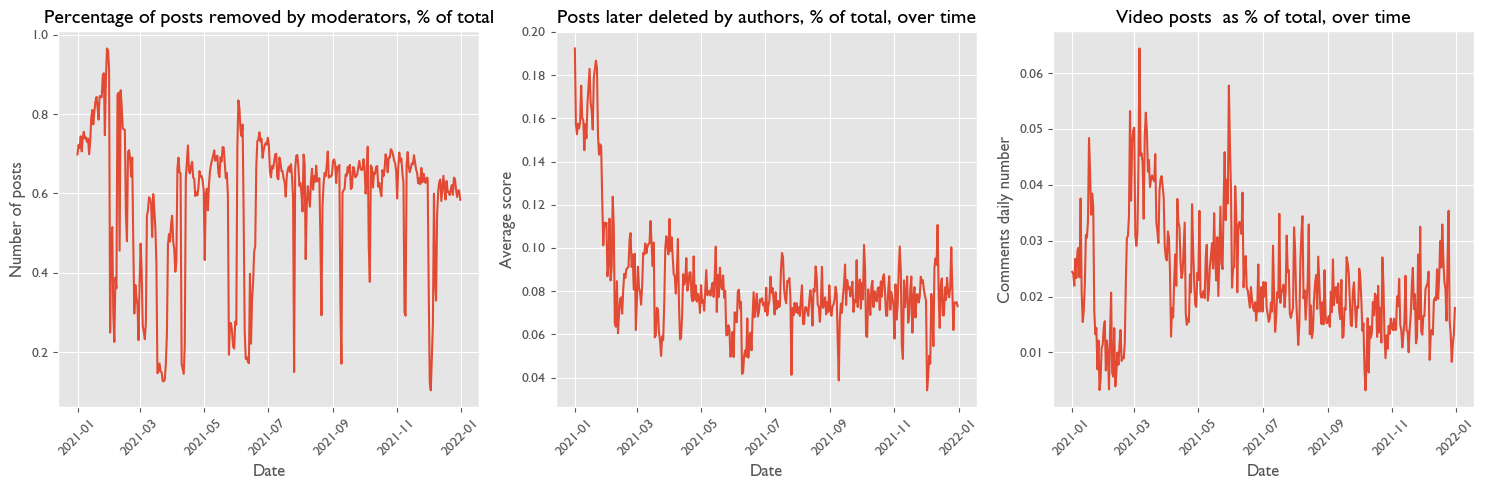

In [113]:
# Create additional columns with % of posts removed/deleted/is video
df_agg_by_date['pct_removed'] = df_agg_by_date['sum_removed'] / df_agg_by_date['total_count'] 
df_agg_by_date['pct_deleted'] = df_agg_by_date['sum_deleted'] / df_agg_by_date['total_count'] 
df_agg_by_date['pct_video'] = df_agg_by_date['sum_video'] / df_agg_by_date['total_count'] 

# Create a figure and a 1x3 subplot layout. ax is a list of AxesSubplots.
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].plot(df_agg_by_date['created'], df_agg_by_date['pct_removed'])
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Number of posts')
ax[0].tick_params(axis='x', rotation=45)
ax[0].set_title('Percentage of posts removed by moderators, % of total')

ax[1].plot(df_agg_by_date['created'], df_agg_by_date['pct_deleted'])
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Average score')
ax[1].tick_params(axis='x', rotation=45)
ax[1].set_title('Posts later deleted by authors, % of total, over time')

ax[2].plot(df_agg_by_date['created'], df_agg_by_date['pct_video'])
ax[2].set_xlabel('Date')
ax[2].set_ylabel('Comments daily number')
ax[2].tick_params(axis='x', rotation=45)
ax[2].set_title('Video posts  as % of total, over time')

plt.tight_layout()
plt.show()

Charts above show whether there was any abnormality in the way the posts have been moderated in 2021.  
Observations:

* % of posts removed was relativeky stable in 2021, however in the period of January-Febrary 2021 was particularly high on removals, with >90% of posts on some days removed by moderators.  Big and brieg dips in the % of posts removed (to 20%) indicate those days when moderation didnt work, for some reason. 

* % of posts subsequently deleted by authors is particularly high for the preiod of January 2021. This is interetsing and requires investigation. On average, 8% of all posts get deleted by their authors, but for posts authored in Jan 2021 it was 16-18%, more than double the average rate. Once we have the sentiment ratings and financial results calculated it will be interetsing to see if tehre is any relationship here. 

* Videos are around 2% of the posts total, but there was a period in Febrary when there was a lot of videos shared around, when that percent spooiked to 6%. 

### 4.4.4. Group by author

Creating a new dataframe where all the important columns are sorted by author.

In [60]:
# Group by the 'Date' column and aggregate columns
df_agg_by_author = df.groupby([df['author']]).agg({
    'id':'count', 
    'score': 'mean',
    'num_comments':'sum',
    'total_awards_received':'sum',
    'num_crossposts':'sum',
    'deleted':'sum',
    'removed':'sum',
    'upvote_ratio':'sum',
    'title':'count',
    'selftext':'count'
}).reset_index().rename(columns={
    'id': 'total_count',
    'score': 'average_score',
    'num_comments': 'sum_comments',
    'total_awards_received': 'sum_awards', 
    'num_crossposts': 'sum_crossposts',
    'deleted':'sum_deleted',
    'removed':'sum_removed',
    'upvote_ratio':'sum_upvoted',
    'selftext':'count_selftext'
})

In [61]:
df_agg_by_author.describe()

,total_count,average_score,sum_comments,sum_awards,sum_crossposts,sum_deleted,sum_removed,sum_upvoted,title,count_selftext
count,584771.00,584771.00,584771.00,584771.00,584771.00,584771.00,584771.00,584771.00,584771.00,584771.00
mean,2.42,65.19,45.16,1.23,0.07,0.22,1.60,2.15,2.42,2.42
std,261.60,1258.55,10325.64,96.52,2.15,169.18,260.84,234.96,261.60,261.60
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,1.00,1.00
25%,1.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00
50%,1.00,1.00,1.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00
75%,2.00,4.00,9.00,0.00,0.00,0.00,1.00,1.88,2.00,2.00
max,200001.00,204095.00,7532139.00,61723.00,1393.00,129375.00,199456.00,179641.36,200001.00,200001.00


In [62]:
# Creating a new field which measures an average number of comments per one post
df_agg_by_author['com_per_post']=df_agg_by_author['sum_comments']/ df_agg_by_author['total_count']

# Sorting the filtering results by the NUMBER OF COMMENTS PER POST
df_agg_by_author.sort_values(by="com_per_post", ascending=False).head(10)

,author,total_count,average_score,sum_comments,sum_awards,sum_crossposts,sum_deleted,sum_removed,sum_upvoted,title,count_selftext,com_per_post
513944,premier_,1,10882.00,67871,306,2,0,0,0.97,1,1,67871.00
434187,grebfar,8,14608.50,432083,1303,19,0,0,6.88,8,8,54010.38
571423,wallstreetboyfriend,4,37106.50,167170,1750,16,0,0,3.83,4,4,41792.50
207805,MotorizedDoucheCanoe,14,12865.43,420556,2079,21,0,0,12.93,14,14,30039.71
484241,mcuban,1,154745.00,27424,2548,57,0,0,0.89,1,1,27424.00
556526,theycallmeryan,3,19742.00,80714,310,10,0,0,2.55,3,3,26904.67
127388,GoBeaversOSU,7,2278.14,149694,417,4,0,0,5.83,7,7,21384.86
77925,Dan_inKuwait,5,3874.00,96022,377,2,0,0,4.06,5,5,19204.40
144552,ITradeBaconFutures,5,29687.20,87137,1119,12,0,2,4.68,5,5,17427.40
303524,Stylux,7,11505.14,91648,571,24,0,0,6.33,7,7,13092.57


The table above shows the top 10 accounts by comments per post.  These are definitely the accounts that had the biggest engagement with and impact on the redditors. 

In [63]:
# Sorting the filtering results by the NUMBER OF COMMENTS
df_top_authors= df_agg_by_author.sort_values(by="sum_comments", ascending=False).head(100)
df_top_authors.head(10)

,author,total_count,average_score,sum_comments,sum_awards,sum_crossposts,sum_deleted,sum_removed,sum_upvoted,title,count_selftext,com_per_post
226381,OPINION_IS_UNPOPULAR,581,2654.91,7532139,31665,267,0,5,512.57,581,581,12964.09
30463,AutoModerator,1906,79.01,2078730,3401,41,0,9,1618.20,1906,1906,1090.62
357199,[deleted],200001,19.27,867328,19075,1393,129375,199456,179641.36,200001,200001,4.34
434187,grebfar,8,14608.50,432083,1303,19,0,0,6.88,8,8,54010.38
207805,MotorizedDoucheCanoe,14,12865.43,420556,2079,21,0,0,12.93,14,14,30039.71
571423,wallstreetboyfriend,4,37106.50,167170,1750,16,0,0,3.83,4,4,41792.50
127388,GoBeaversOSU,7,2278.14,149694,417,4,0,0,5.83,7,7,21384.86
339987,VisualMod,157,178.89,147040,441,18,0,3,125.69,157,157,936.56
81995,DeepFuckingValue,17,106921.29,141340,61723,340,0,0,15.74,17,17,8314.12
583953,zjz,12,3713.83,137665,876,6,0,2,10.76,12,12,11472.08


The table above shows the top accounts by the total number of comments received. There is a significant overlap between these two top league tables. Finally, let's look at the top accounts by their avearge score per post:

In [64]:
# Sorting the filtering results by the AVERAGE SCORE
df_top_authors= df_agg_by_author.sort_values(by="average_score", ascending=False).head(100)
df_top_authors.head(10)

,author,total_count,average_score,sum_comments,sum_awards,sum_crossposts,sum_deleted,sum_removed,sum_upvoted,title,count_selftext,com_per_post
7274,84935,1,204095.00,5846,1697,75,0,0,0.96,1,1,5846.00
365686,always_plan_in_advan,1,167676.00,3850,789,26,0,0,0.95,1,1,3850.00
545739,string_beans,1,167635.00,4274,885,30,0,0,0.92,1,1,4274.00
484241,mcuban,1,154745.00,27424,2548,57,0,0,0.89,1,1,27424.00
114882,FlawlessBoltX,1,130886.00,2411,861,30,0,0,0.88,1,1,2411.00
580510,yellow_duck12,1,119786.00,1085,136,7,0,0,0.97,1,1,1085.00
209367,MrPostmanLookatme,1,112123.00,4007,203,19,0,0,0.92,1,1,4007.00
178223,Lansman,1,107107.00,3332,571,12,0,0,0.93,1,1,3332.00
81995,DeepFuckingValue,17,106921.29,141340,61723,340,0,0,15.74,17,17,8314.12
359146,_saucy_balloon,1,106819.00,2132,812,47,0,0,0.93,1,1,2132.00


Observations:  

1. There is a significant overlap between the first two groups of most influential authors.  Given that the dataset is so imbalanced between the top influencers and the rest, I need to filter the most influential authors into a separate category.
2. There were some authors that posted only once, but got amazing engagement (see the table above). Although such authors clearly added fuel to the fire I will not count such accounts as the top influencers, due to the one off nature of their interaction with the crowd.  

In the filter below I looked at what were the dates of all those posts when the score of some posts exceeded 90,000 per post. Most of them happened on 28-30 January 2021, during the GME short squeeze. 

In [65]:
extreme_engagement_per_post = df[df['score'] > 90000]
extreme_engagement_per_post.head(2)

,id,author,created,pinned,removed,deleted,is_self,is_video,title,link_flair_text,...,gilded,total_awards_received,num_comments,num_crossposts,selftext,shortlink,FolderName,word_count_selftext,word_count_title,date
108,lawubt,mcuban,2021-02-02 14:35:23,0,0,0,1,0,"Hey everyone, Its Mark Cuban. Jumping on to do an AMA.... so Ask Me Anything",Discussion,...,23,2548,27424,57,Lets Go !,https://redd.it/lawubt,wallstreetbets,3,15,2021-02-02
126,l78uct,DeepFuckingValue,2021-01-28 21:06:23,0,0,0,0,0,GME YOLO update — Jan 28 2021,YOLO,...,123,7928,24240,33,nan,https://redd.it/l78uct,wallstreetbets,1,7,2021-01-28


In [66]:
# I calculate the threshold for top 1% of 'num_comments' in the dataframe grouped by author:
threshold_num_comments_author = df_agg_by_author['total_count'].quantile(0.99)
print(threshold_num_comments_author)

16.0


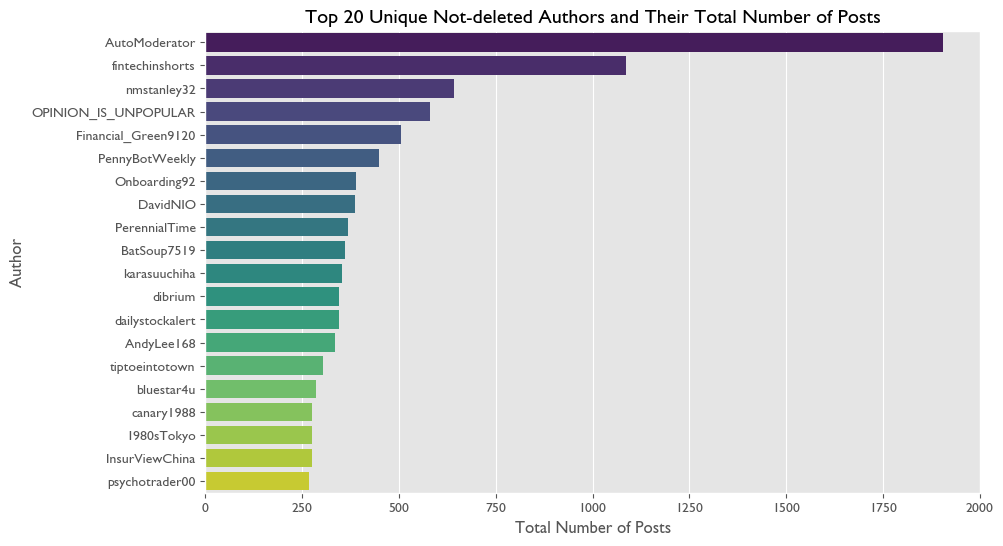

In [67]:
# Calculate the number of posts per author
author_counts = df['author'].value_counts()

# Exclude the count for author "[deleted]"
author_counts = author_counts.drop("[deleted]", errors='ignore')

# Get the top 20 authors and their post counts
top_20_authors = author_counts.head(20)

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_20_authors.values, y=top_20_authors.index, palette="viridis")
plt.title("Top 20 Unique Not-deleted Authors and Their Total Number of Posts")
plt.xlabel("Total Number of Posts")
plt.ylabel("Author")
plt.show()


Observation: 
The average number of posts for the most active accounts is >250, this should be enough to calculate their performance as "financial advisors".

### 4.4.5. Selftext field

In [68]:
#selecting rows with a specific value (name in this case)
df[df['author']=='DeepFuckingValue']

,id,author,created,pinned,removed,deleted,is_self,is_video,title,link_flair_text,...,gilded,total_awards_received,num_comments,num_crossposts,selftext,shortlink,FolderName,word_count_selftext,word_count_title,date
126,l78uct,DeepFuckingValue,2021-01-28 21:06:23,0,0,0,0,0,GME YOLO update — Jan 28 2021,YOLO,...,123,7928,24240,33,nan,https://redd.it/l78uct,wallstreetbets,1,7,2021-01-28
152,l846a1,DeepFuckingValue,2021-01-29 21:04:45,0,0,0,0,0,GME YOLO month-end update — Jan 2021,YOLO,...,63,4810,21087,30,nan,https://redd.it/l846a1,wallstreetbets,1,7,2021-01-29
166,lb6jld,DeepFuckingValue,2021-02-02 21:11:48,0,0,0,0,0,GME YOLO update — Feb 2 2021,YOLO,...,45,3944,18108,27,nan,https://redd.it/lb6jld,wallstreetbets,1,7,2021-02-02
257,lnqgz8,DeepFuckingValue,2021-02-19 21:05:55,0,0,0,0,0,GME YOLO update — Feb 19 2021,YOLO,...,144,9030,11577,53,nan,https://redd.it/lnqgz8,wallstreetbets,1,7,2021-02-19
264,msblc3,DeepFuckingValue,2021-04-16 20:20:13,0,0,0,0,0,GME YOLO update — Apr 16 2021 — final update,YOLO,...,292,11491,11338,83,nan,https://redd.it/msblc3,wallstreetbets,1,10,2021-04-16
329,lbykxg,DeepFuckingValue,2021-02-03 21:18:25,0,0,0,0,0,GME YOLO update — Feb 3 2021 – heads up gonna back off the daily updates for now,YOLO,...,19,2753,9715,9,nan,https://redd.it/lbykxg,wallstreetbets,1,18,2021-02-03
479,mbpclz,DeepFuckingValue,2021-03-23 21:30:31,0,0,0,0,0,GME YOLO update — Mar 23 2021,YOLO,...,47,4047,7571,25,nan,https://redd.it/mbpclz,wallstreetbets,1,7,2021-03-23
484,m0q5bm,DeepFuckingValue,2021-03-08 21:08:31,0,0,0,0,0,GME YOLO update — Mar 8 2021,Hang In There,...,69,7016,7557,18,nan,https://redd.it/m0q5bm,wallstreetbets,1,7,2021-03-08
509,lt7v4w,DeepFuckingValue,2021-02-26 21:07:18,0,0,0,0,0,GME YOLO month-end update — Feb 2021,YOLO,...,32,3443,7311,21,nan,https://redd.it/lt7v4w,wallstreetbets,1,7,2021-02-26
585,l2x7he,DeepFuckingValue,2021-01-22 21:14:08,0,0,0,0,0,GME YOLO update — Jan 22 2021,YOLO,...,15,1327,6460,7,nan,https://redd.it/l2x7he,wallstreetbets,1,7,2021-01-22


Observations: 

* Keith Gill (writing under the name ""DeepF***Value""), one of the most prominent cheerleaders of the subreddit, posted 17 times in 2021. Unfortunately, none of his posts have self text ('nan' values only). He posted snapshot pictures of his portfolio instead (sharing the tickers, and the performance to day), and these posts received a lot of response. As performance of his portfolio skyrocketed the number of comments increased exponentially, too.  The NLP techniques will not be able to pick up on that. However, for select situations like this one, we can manually translate the content of the pictures into analysable text, so that his contribution is captured in the output, as well. I will need to check other top influencers’ accounts to see if other highly influential accounts need to be corrected in the same manner.  

* One useful field is the 'link_flair_text' where authors can classify the topic of their post under a certain rubric, "YOLO", or "Hang In There". The rubric of the post selected by the author carries a significant meaning, and should be also analysed, in addition to selftext and title.    


In [69]:
# a hedge fund manager who posted deep dives, started posting in 2020. Published insiightful posts. 
df_agg_by_author[df_agg_by_author['author'] == 'Robertf1032010']

,author,total_count,average_score,sum_comments,sum_awards,sum_crossposts,sum_deleted,sum_removed,sum_upvoted,title,count_selftext,com_per_post
268559,Robertf1032010,2,4374.00,1332,79,4,0,0,1.77,2,2,666.00


In [70]:
# Just an average poster - 2 posts, not much following 
df_agg_by_author[df_agg_by_author['author'] == 'sadshark']

,author,total_count,average_score,sum_comments,sum_awards,sum_crossposts,sum_deleted,sum_removed,sum_upvoted,title,count_selftext,com_per_post
527682,sadshark,5,10.20,185,1,0,0,3,3.64,5,5,37.00


### 4.4.6. Word Counts

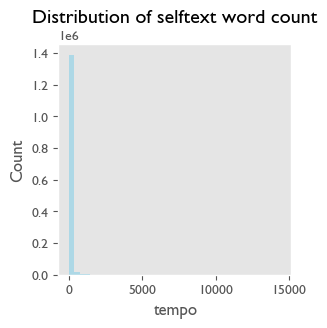

In [71]:
# Plot a histogram of selftext word counts
plt.figure(figsize=(3,3))
df.word_count_selftext.hist(bins=40, grid=False, color='lightblue')
plt.title('Distribution of selftext word count')
plt.xlabel('tempo')
plt.ylabel('Count')
plt.show()

Observation: 

The distribution is extremely skewed, with majority (>75%) of posts having a very small number of words (deleted or removed ones).  But a very small percentage of authors posted very lengthy posts that skewed the right tail a lot. I will plot the distribution of selftext word count between 2 and 1000 words. We can see that majority of non-empty posts have between 2 and 200 words.   

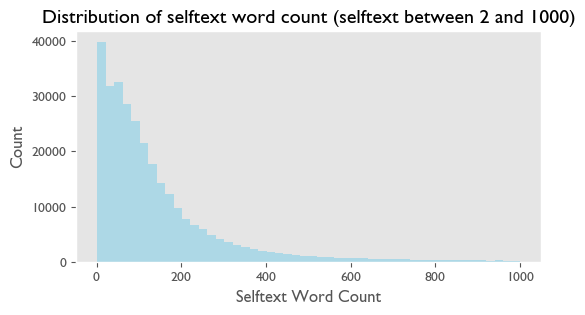

In [72]:
# Filtering out those rows where word count is less than 2:
decent_wordcount_selftext = df[(df['word_count_selftext'] >= 2) & (df['word_count_selftext'] <= 1000)]

# Plot the histogram
plt.figure(figsize=(6, 3))
decent_wordcount_selftext['word_count_selftext'].hist(bins=50, grid=False, color='lightblue')
plt.title('Distribution of selftext word count (selftext between 2 and 1000)')
plt.xlabel('Selftext Word Count')
plt.ylabel('Count')
plt.show()

Now we repeat the same exercise for the title word count. We can see similarly skewed distribution here:

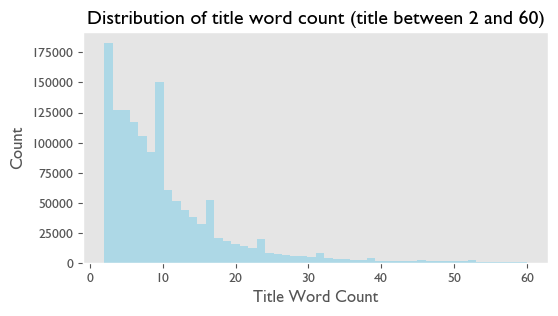

In [73]:
# Filtering out those rows where word count is less than 2:
decent_wordcount_title = df[(df['word_count_title'] >= 2) & (df['word_count_title'] <= 60)]

# Plot the histogram
plt.figure(figsize=(6, 3))
decent_wordcount_title['word_count_title'].hist(bins=50, grid=False, color='lightblue')
plt.title('Distribution of title word count (title between 2 and 60)')
plt.xlabel('Title Word Count')
plt.ylabel('Count')
plt.show()

### 4.4.7. Score

More than half of posts received score of only 0 or 1, as I show in the graph below. To be considered a top 1% post by the number of likes (score) it should have received more than 1017 upvotes.  

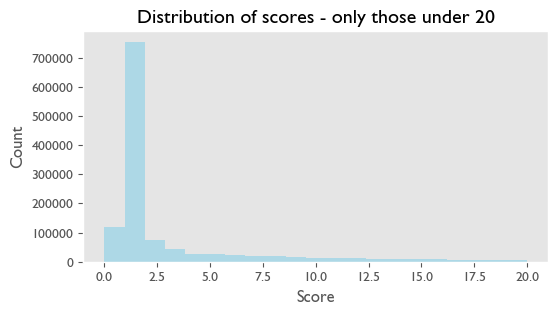

In [74]:
# Filtering out those rows where the value for score is small, between 0 and 20:
low_score = df[(df['score'] >=0) & (df['score'] <=20)]

# Plot the histogram for scores
plt.figure(figsize=(6, 3))
low_score['score'].hist(bins=21, grid=False, color='lightblue')
plt.title('Distribution of scores - only those under 20')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

In [75]:
# I calculate the threshold for top 1% of 'num_comments' in our dataframe:
threshold_score = df['score'].quantile(0.99)
print(threshold_score)

1017.0


### 4.4.8. Number of comments

One third of the posts (500k) received zero comments. Next 400,000 posts received only 1 comment. However, the maximum for this field is 99,346 comments per one post. <br>Let's look at the distribution of comments for posts that received at least 1 comment (but less than 50).  We can see similarly right skewed distribution here, with majority of the posts (>50%) receiving one or less comments, and a very small minority of the posts receiving a very large number of comments. For a post to be considered among top 1% it should have received at least 158 comments: 

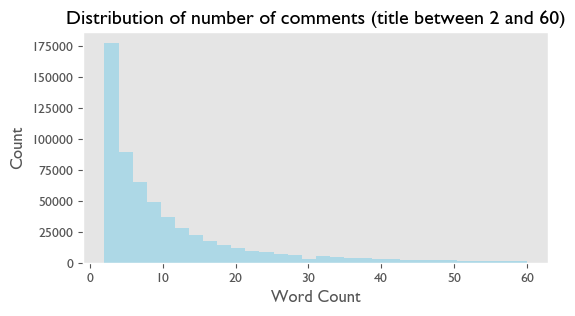

In [76]:
# Filtering out those rows where the value for num_comments is less than 2:
low_comments = df[(df['num_comments'] >=2) & (df['num_comments'] <= 60)]

# Plot the histogram
plt.figure(figsize=(6, 3))
low_comments['num_comments'].hist(bins=30, grid=False, color='lightblue')
plt.title('Distribution of number of comments (title between 2 and 60)')
plt.xlabel('Word Count')
plt.ylabel('Count')
plt.show()

In [77]:
# I calculate the threshold for top 1% of 'num_comments' in our dataframe:
threshold_num_comments = df['num_comments'].quantile(0.99)
print(threshold_num_comments)

158.0


### 4.4.9. Number of crossposts

We see a very similar picture in the distribution of crossposts. Crossposting is not something that was popular, it seems: 99% of posts have 0 crossposts.  Anything above 0 is already in the top 1% of the distribution.  

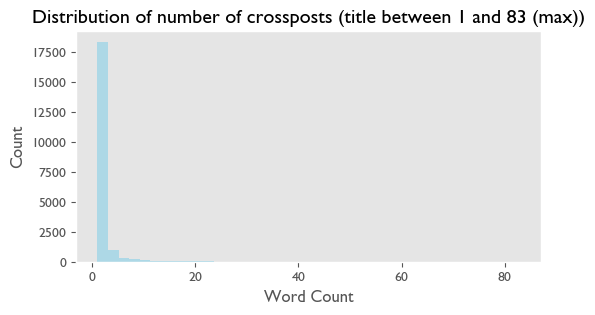

In [78]:
# Filtering out those rows where the value for num_comments is less than 1:
low_crossposts = df[(df['num_crossposts'] >= 1) & (df['num_crossposts'] <= 83)]

# Plot the histogram
plt.figure(figsize=(6, 3))
low_crossposts['num_crossposts'].hist(bins=40, grid=False, color='lightblue')
plt.title('Distribution of number of crossposts (title between 1 and 83 (max))')
plt.xlabel('Word Count')
plt.ylabel('Count')
plt.show()

In [79]:
# I calculate the threshold for top 1% of 'num_crossposts' in our dataframe:
threshold_num_crossposts = df['num_crossposts'].quantile(0.99)
print(threshold_num_crossposts)

1.0


In [80]:
correlation = df['num_crossposts'].corr(df['score'])
print(f"Correlation between 'num_crossposts' and 'score': {correlation}")

Correlation between 'num_crossposts' and 'score': 0.6957818757958973


I dont think this is a very important field: it is sparcely populated, and  it is only 70% correlated to the score of that post, so I will delete this column. 

In [81]:
df = df.drop('num_crossposts', axis=1)

### 4.4.10. Pinned

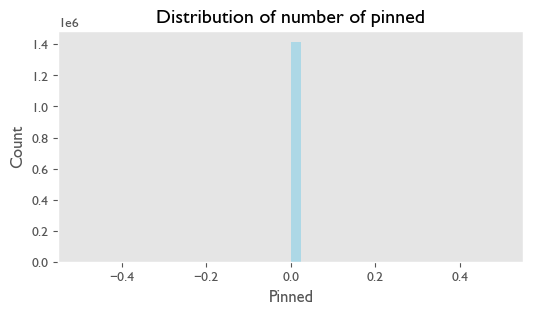

In [82]:
# Filtering out those rows where the value for num_comments is less than 1:
low_pinned = df[(df['pinned'] >= 0) & (df['pinned'] <= 10)]

# Plot the histogram
plt.figure(figsize=(6, 3))
low_pinned['pinned'].hist(bins=40, grid=False, color='lightblue')
plt.title('Distribution of number of pinned')
plt.xlabel('Pinned')
plt.ylabel('Count')
plt.show()

Pinned is another column that can be safely fropped: it contains only zeros. 

In [83]:
df = df.drop('pinned', axis=1)

## 4.5. EDA Bivariate Analysis

### 4.5.1. Correlation matrix

I run correlations on 3 different dataframes - a) the original one, with individual posts, b) grouped by date and c) grouped by author.  

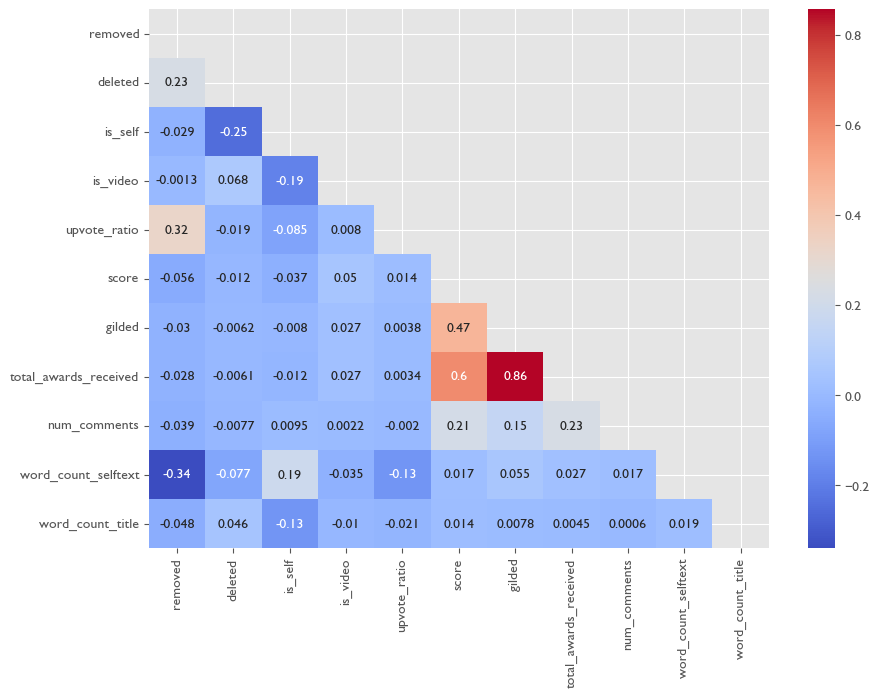

In [84]:
# Correlation of the variables in a heatmap for the dataframe by individual posts

numerical_cols = df.select_dtypes(include=[np.number])
corr_matrix = numerical_cols.corr()
matrix = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(10,7))
sns.heatmap(corr_matrix, annot=True, mask=matrix, cmap='coolwarm')
plt.show()


'gilded' and 'total award received" seem to be highly correlated.  Both columns are not very significant, I am deleting the "gilded" column. 
After deleting the 'gilded" column I re-run the correlation matrix and I can see that the "total awards received" is also 0.6 correlated to "score". So, I am deleting the "total award" column as well. 

I am not planning to run a lot of correlation studies at this point, as my prime focus is the text fields.  My target variable is yet to be calculated (the sentiment of each post) and therefore it is premature to run extensive correlations (will be done at the later stages).

In [85]:
df = df.drop('gilded', axis=1)

In [86]:
df = df.drop('total_awards_received', axis=1)

### 4.5.2. Comments and score - pairwise

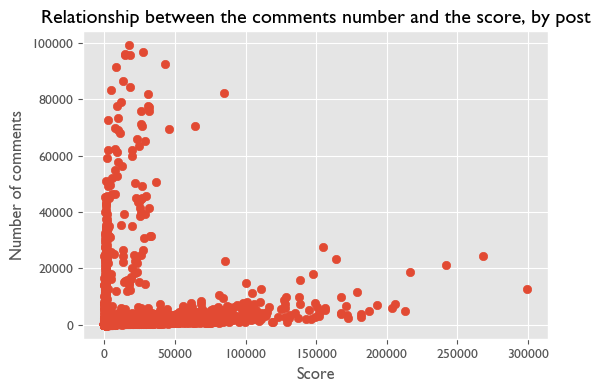

In [87]:
# scatterplot between commentsa nd score, by individual post
plt.figure()
plt.scatter(df['score'], df['num_comments'])
plt.title('Relationship between the comments number and the score, by post')
plt.xlabel('Score')
plt.ylabel('Number of comments')
plt.show()

We would expect some degree of relationships between these two variables: more impactful posts should theoretically receive both a lot of likes and a lot of comments. However, the correlation coefficient here is 0.2, not very high.  It is worth exploring this in more detail: possibly there might have been certain types of posts that received mostly comments, and some others mostly received upvotes/likes, it is hard to know.  The number of comments does not correlate well to any other numerical field. 


### 4.5.3. Comments and posts counts - by date

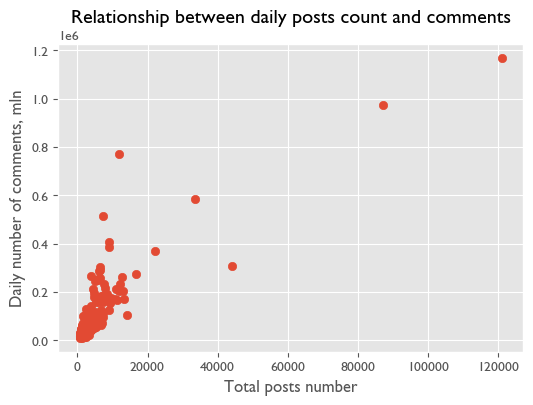

In [88]:
# scatterplot  - group BY DATE
plt.figure()
plt.scatter(df_agg_by_date['total_count'], df_agg_by_date['total_comments'])
plt.title('Relationship between daily posts count and comments')
plt.xlabel('Total posts number')
plt.ylabel('Daily number of comments, mln')
plt.show()

As expected, there is relationship between the number of posts on that day, and the number of comments.  The chart below shows relationship between these two vaiables, if grouped by date.  There are two prominent outliers here - these are the two days in January 2021, when the GameStop short squeeze was happening, and this explain the enormous number of posts and comments on these two days.  

### 4.5.4. Comments per post and average score by author

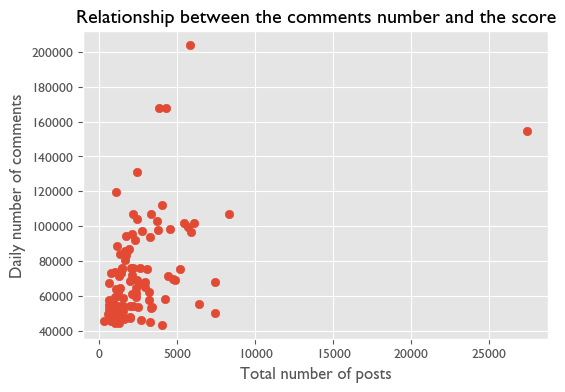

In [89]:
# scatterplot
plt.figure()
plt.scatter(df_top_authors['com_per_post'], df_top_authors['average_score'])
plt.title('Relationship between the comments number and the score')
plt.xlabel('Total number of posts')
plt.ylabel('Daily number of comments')
plt.show()

### 4.5.5. Top 10 accounts ranked by comments

In [90]:
# Sort the DataFrame by "comments_per_author" in descending order
df_agg_by_author_sorted = df_agg_by_author.sort_values(by='com_per_post', ascending=False)

# Print the summary of top accounts ranked from highest to lowest "comments_per_post"
print("Top Accounts Ranked by Comments Per Post:")
print(df_agg_by_author_sorted[['author', 'com_per_post']].head(20))


Top Accounts Ranked by Comments Per Post:
                      author  com_per_post
513944              premier_      67871.00
434187               grebfar      54010.38
571423   wallstreetboyfriend      41792.50
207805  MotorizedDoucheCanoe      30039.71
484241                mcuban      27424.00
556526        theycallmeryan      26904.67
127388          GoBeaversOSU      21384.86
77925           Dan_inKuwait      19204.40
144552    ITradeBaconFutures      17427.40
303524                Stylux      13092.57
226381  OPINION_IS_UNPOPULAR      12964.09
583953                   zjz      11472.08
284502              Shrubber      11242.00
81995       DeepFuckingValue       8314.12
76145              DNXPeeJay       7448.00
124083              Geko2012       7428.50
9144                   AOCnp       6398.00
199442           Medium-Mano       6050.00
399928            crispizzle       5900.00
7274                   84935       5846.00


The top authors received 5-68 thousand comments per post! 

Observations: 

Account named OPINION_IS_UNPOPULAR has been one of the most prominent cheerleaders of the WSB subreddit. On the scatterplot above that account is a distant outlier being #1  both in terms of the number of posts (630) and the number of comments received (7.5mln)). 

We can see that there is no correlation between the number of posts and the number of comments received. There were two other accounts that received an enormous number of comments (>400k each), even though they were not the most prolofic posters. Perhaps their posts were very impressive and incited a lot of emotions. 

This group of the authors that generated the most of the comments should be carefully examined as they were probably the most influential ones.

### 4.5.6. Top influencers

In [91]:
# Step 1: Calculate threshold for top 0.001% of authors by varoius metrics
threshold_num_comments = df_agg_by_author['sum_comments'].quantile(0.9999)
threshold_id_count = df_agg_by_author['total_count'].quantile(0.9999)
threshold_score = df_agg_by_author['average_score'].quantile(0.9999)

print(f'The number of comments threshold is: {threshold_num_comments:.0f}')
print(f'The number of posts threshold is: {threshold_id_count:.0f}')
print(f'The score threshold is: {threshold_score:.0f}')


The number of comments threshold is: 9104
The number of posts threshold is: 159
The score threshold is: 61402


In [92]:
# Step 2: Select rows that meet either of the top 1% threshold requirements: 
df_influencers = df_agg_by_author[
    (df_agg_by_author['sum_comments'] >= threshold_num_comments) |
    (df_agg_by_author['total_count'] >= threshold_id_count) |
    (df_agg_by_author['average_score'] >= threshold_score)
]
df_influencers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 165 entries, 2672 to 584460
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   author          165 non-null    object 
 1   total_count     165 non-null    int64  
 2   average_score   165 non-null    float64
 3   sum_comments    165 non-null    int64  
 4   sum_awards      165 non-null    int64  
 5   sum_crossposts  165 non-null    int64  
 6   sum_deleted     165 non-null    int64  
 7   sum_removed     165 non-null    int64  
 8   sum_upvoted     165 non-null    float64
 9   title           165 non-null    int64  
 10  count_selftext  165 non-null    int64  
 11  com_per_post    165 non-null    float64
dtypes: float64(3), int64(8), object(1)
memory usage: 16.8+ KB


### 4.5.7. Grouping by subreddit

In [93]:
# Group by the 'Date' column and aggregate columns
df_agg_by_foldername = df.groupby([df['FolderName']]).agg({
    'id':'count', 
    'score': 'mean',
    'num_comments':'sum',
    'deleted':'sum',
    'removed':'sum',
    'upvote_ratio':'sum',
    'title':'count',
    'selftext':'count'
}).reset_index().rename(columns={
    'id': 'total_count',
    'score': 'average_score',
    'num_comments': 'sum_comments',
    'deleted':'sum_deleted',
    'removed':'sum_removed',
    'upvote_ratio':'sum_upvoted',
    'selftext':'count_selftext'
})

In [94]:
df_agg_by_foldername

,FolderName,total_count,average_score,sum_comments,sum_deleted,sum_removed,sum_upvoted,title,count_selftext
0,finance,6594,33.87,35857,488,5832,6228.74,6594,6594
1,financialindependence,9786,32.04,314517,560,8294,6871.90,9786,9786
2,forex,14161,6.59,89770,1022,5474,11974.28,14161,14161
3,gme,268387,102.02,3107763,25121,56389,228596.10,268387,268387
4,investing,38609,18.08,398330,819,32976,35324.22,38609,38609
5,options,27965,10.69,293933,1406,12426,23480.96,27965,27965
6,pennystocks,50809,30.20,564860,2622,34327,45521.00,50809,50809
7,personalfinance,129241,10.15,1335814,8946,30995,97539.12,129241,129241
8,robinhood,17564,5.16,37747,518,16744,17071.79,17564,17564
9,robinhoodpennystocks,21239,32.55,182629,1788,15457,19436.48,21239,21239


### 4.5.8. Filter out only those rows that specifically mention GME

**Observation**:

I have identified a labelled dataset published by researchers from U of Texas in San Antonio, and I plan to use that dataset for testing various NLP approaches to text processing.  That dataset focuses specifically on intention to buy GME stock, as it was expressed by Redditors. I want to isolate all rows where GME is mentioned and save them in a new csv file for further modelling. 

In [95]:
# Define a regular expression pattern to match GME possible spellings
pattern = r'GME|Gamestop|gamestop|game stop'

# Checking for the pattern in both 'selftext' and 'title'
select_df = df[df['selftext'].str.contains(pattern, na=False) | df['title'].str.contains(pattern, na=False)]

In [96]:
# Group by the 'FolderName' column and aggregate columns
df_agg_by_subreddit_stock = df.groupby([select_df['FolderName']]).agg({
    'id':'count', 
    'score': 'mean',
    'num_comments':'sum',
    'deleted':'sum',
    'removed':'sum',
    'upvote_ratio':'sum',
    'title':'count',
    'selftext':'count'
}).reset_index().rename(columns={
    'id': 'total_count',
    'score': 'average_score',
    'num_comments': 'sum_comments',
    'deleted':'sum_deleted',
    'removed':'sum_removed',
    'upvote_ratio':'sum_upvoted',
    'selftext':'count_selftext'
})

In [97]:
df_agg_by_subreddit_stock

,FolderName,total_count,average_score,sum_comments,sum_deleted,sum_removed,sum_upvoted,title,count_selftext
0,finance,21,3.14,31,4,20,17.45,21,21
1,financialindependence,20,111.35,872,2,11,11.56,20,20
2,forex,14,12.07,101,2,3,10.37,14,14
3,gme,58339,141.21,1087750,3933,8663,49041.39,58339,58339
4,investing,689,109.36,32538,10,549,615.63,689,689
5,options,1112,41.61,26544,39,292,886.45,1112,1112
6,pennystocks,311,118.37,18186,17,239,280.85,311,311
7,personalfinance,41,1.29,97,0,30,36.02,41,41
8,robinhood,305,13.05,899,15,300,300.72,305,305
9,robinhoodpennystocks,416,35.67,5814,32,280,358.35,416,416


#### Final cleaning before saving

In [98]:
# Drop the rows where the 'author' column is 'AutoModerator' (not a new content, only moderating)
indices_to_drop = df[df['author'].isin(['AutoModerator', 'OPINION_IS_UNPOPULAR'])].index
df.drop(indices_to_drop, inplace=True)

In [99]:
# Filling in empty cells for selftext field
df['selftext'].fillna('notextprovided', inplace=True)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1414449 entries, 1 to 1416935
Data columns (total 18 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   id                   1414449 non-null  object        
 1   author               1414449 non-null  object        
 2   created              1414449 non-null  datetime64[ns]
 3   removed              1414449 non-null  int64         
 4   deleted              1414449 non-null  int64         
 5   is_self              1414449 non-null  int64         
 6   is_video             1414449 non-null  int64         
 7   title                1414449 non-null  object        
 8   link_flair_text      1414449 non-null  object        
 9   upvote_ratio         1414449 non-null  float64       
 10  score                1414449 non-null  int64         
 11  num_comments         1414449 non-null  int64         
 12  selftext             1414449 non-null  object        
 13  sh

#### Exporting cleaned dataset

In [101]:
# Exporting the file to a cleaned CSV file, dropping the index but retaining the id column so that I can reset index in my new dataframes 
# but still be able to link my files using this as an index 
df.to_csv('../data/reddit_cleaned.csv', index=False)

In [102]:
# Drop the rows where the 'FolderName' column is not related to wallstreetbets community
folders_to_drop = df[df['FolderName'].isin(['personalfinance', 'securityanalysis', 'forex', 'financialindependence'])].index
df.drop(folders_to_drop, inplace=True)

In [103]:
# Saving selected rows without unrelated subreddits into a separate csv file for further NLP modelling and testing.  
df.to_csv('../data/reddit_cleaned_slim.csv', index=False)

In [104]:
# Define a regular expression pattern to match GME possible spellings
pattern = r'GME|Gamestop|gamestop|game stop'

# Checking for the pattern in both 'selftext' and 'title'
select_df = df[df['selftext'].str.contains(pattern, na=False) | df['title'].str.contains(pattern, na=False)]

In [105]:
# Saving selected rows containing pattern "GME-like" mentions into a separate csv file for further NLP modelling and testing.  
select_df.to_csv('../data/reddit_GMEonly_cleaned.csv', index=False)

## 4.6. Conclusion on EDA

**The Reddit dataset overall** 

1.	The raw data included 1.5m rows, 25 columns.  After cleaning the data we have 1.414m rows and 19 columns. 
2.	Most of the dataset (51% of cleaned records) comes from r/wallstreetbets subreddit. There are some other finance related subreddits included in the dataset (30% of total, split between 12 different smaller subreddits). 
3.	Overall, **the data is very unevenly distributed** with just a few posts receiving most of the attention (by number of comments, number of cross posts, score and awards received). Same goes for chronological distribution of data, it is extremely uneven. 

**Time considerations**

4.	There was **a huge spike in the number of posts and comments that lasted for 2 weeks starting on 28 Jan 2021**, but also on some days in February and March 2021. These two weeks starting 28 Jan 2021 were truly exceptional, the daily activity increased by 60-130 times (>90,000 posts per day), and should be labelled as such during the encoding process.  

**Column-specific observations**

|FIELD                      |Max    |Mean|Top 1% threshold|Comment                                                                           |
|---------------------------|-------|----|----------------|----------------------------------------------------------------------------------|
|Score                      |299,489|84  |1,017           |a very skewed distribution. More than half of posts received score of only 0 or 1.|
|Total awards received      |11,491 |0.49|                |a very skewed distribution                                                        |
|Number of comments per post|99,346 |18  |158             |0.9m of posts received only 0-1 comment.                                          |
|Length of selftext         |14,410 |36  |1               |Long posts have 2000-3000 words. The distribution is extremely skewed.            |
|Length of title            |143    |10  |1               |The majority of the post titles are very short, 4-7 words                         |


5.	Deleted: 9.3% of records were subsequently deleted by the author (but we still have the text)
6.	Removed: 67% of the records were removed by the moderators. 
7.	‘is_video’: 2% of records had video attached.
8.	Upvote ratio: 89% of posts had more positive votes than negative, as most of them are >0.5.  A small minority of messages have rating <0.5 (more negatives than positives)

**Author**

9.	This is the most important field in our study, as we focus on each account's track record. After cleaning we have 585k unique authors, i.e. roughly 2 posts per non-deleted author. Some authors deleted their accounts before the information was scraped into the dataset (219k), so we don’t have their names (15% of total records). 

|Measurement                |Max    |Mean|Top 1% threshold|Comment                                                                           |
|---------------------------|-------|----|----------------|----------------------------------------------------------------------------------|
|Number of posts per author in 2021|630    |2.4 |16              |250-630 for top accounts                                                          |
|Number of comments per author in 2021|7,532,139|9   |383             |                                                                                  |
|Average score per post, by author|204,095|65  |713             |                                                                                  |


**Top authors**

10.	Top authors typically receive 13,000-67,000 comments per average post. 
11.	The average number of posts per year for the most active accounts is 250-630, this should be enough to calculate their performance as "financial advisors".
12.	Author named OPINION_IS_UNPOPULAR has been one of the most prominent cheerleaders of the WSB subreddit. On the scatterplot above that account is a distant outlier being #1 both in terms of the number of posts (630) and the number of comments received in 2021 (7.5mln)). 
13.	Keith Gill (""DeepF***Value"") posted only 17 times in 2021, with no text, and only snapshots of his portfolio spectacular performance. The NLP techniques will not be able to pick up on that. I may need to consider manually encoding this graphic content to text, so that his contribution is captured in the output, as well. Also, I need to check other top influencers accounts to see if other highly influential accounts need to be encoded in the same manner. 
14.	**A relatively small group of the authors that generated most of the comments should be carefully examined as they were probably the most influential ones.**
15.	Given that the dataset is so imbalanced between the top influencers and the rest, I need to encode the most influential authors into a separate category.   


**Self-text**

16.	This is a very important field for further NLP analysis of the text.  We have a number of problems here: 

	* a)	Only 21% of all rows (297k ) have long form meaningful text that can be analysed.  This is disappointing, much less than the size of the dataset, but still acceptable.  
	* b)	A post can be considered long if it has 2-3K words (the distribution has very long right tail). Majority of non-empty posts have between 2 and 200 words.   
	* c)	Slang. There is a heavy usage of slang inside the WallStreetBets subreddit. Certain expressions are very unique and hard to decipher for an outsider. Several previous attempts to build a combined sentiment score detected no clear pattern, partly due to such semantic difficulties. **I started collecting a dictionary of such unique slang terms to replace them with normal English language meaning before applying ML techniques.**  
	* d)	Hidden meaning.  Some researchers who previously analysed the WSB text for ML purposes struggled with topic detection. It is quite often hidden in a context and understood only by the group participants. This will be an additional challenge highlighted in the work of previous DS analysts.  
	* e)	Heavy use of emojis:  some authors used emojis instead of words to signpost their bullish sentiment. I need to preserve, separate and count those emojis and convert them into text for ML processing of sentiment. 

**Title**

17.	The title field is very important in this study. It might be short, maybe just one sentence, but it may clearly indicate sentiment or attitude. All of our 1.5m records do have such non-null rows, and 1.35m of them are unique, whereas longer ‘selftext’ is present only in 21% of the initial records. 

**'Link_flair_text'**

18.	Also a very useful short string field where authors can classify the topic of their post under a certain rubric, "YOLO", or "Hang In There". The rubric of the post selected by the author carries a mood or meaning, and should be also analysed, in addition to ‘selftext’ and title.

**Removed**

19.	It will be interesting to understand what makes a post likely to be deleted by the moderators. We have a huge number of observations (1 million), so we can draw some inferences from that. If time allows, I can run a logistical regression on this field to see if we can determine what attributes of a post make it more likely to be deleted. 

**Feature Engineering Ideas**

20.	Encode the following additional features:
a.	Boolean mask for days with abnormally high level of activity.
b.	Boolean mask for top 50 authors. 
c.	Count and separate emojis for each post.

In the section below, I am cleaning the text data to prepare it for text processing using ML techniques.

## 4.7. Text cleaning and pre-processing

The code below is a close copy of the notebook for cleaning the labelled dataset (Notebook 01). 

In this section, I prepare the Reddit dataset for subsequent modelling.  I perform the following steps:

1. I merged the 'title' and 'selftext' fields from the reddit dataset into one new column named 'text'.  This is done to simplify processing (to process one column, instead of two). Moreover, in nearly 30% of rows 'selftext' has missing value, whereas 'title' column had no missing values.  It made sense to combine these two columns as they carry no significant difference in meaning or significance. 
2. I repeat all the same cleaning steps that I designed for cleaning the labelled dataset (removing website links, empty spaces removal)
3. Filter out rows where 'link_flair_text' is irrelevant. 

The result is a csv file that is prepared for further machine processing. 

In [115]:
df_clean = df.copy()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1260374 entries, 1 to 1416935
Data columns (total 18 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   id                   1260374 non-null  object        
 1   author               1260374 non-null  object        
 2   created              1260374 non-null  datetime64[ns]
 3   removed              1260374 non-null  int64         
 4   deleted              1260374 non-null  int64         
 5   is_self              1260374 non-null  int64         
 6   is_video             1260374 non-null  int64         
 7   title                1260374 non-null  object        
 8   link_flair_text      1260374 non-null  object        
 9   upvote_ratio         1260374 non-null  float64       
 10  score                1260374 non-null  int64         
 11  num_comments         1260374 non-null  int64         
 12  selftext             1260374 non-null  object        
 13  sh

In [116]:
# Step 1. Concatenate 'title' and 'selftext' into a new column 'title_selftext'
df_clean['Text'] = df_clean['title'] + ' ' + df_clean['selftext'].fillna('')

# Check for missing values in the new 'title_selftext' column
missing_values = df_clean['Text'].isnull().sum()

# Print the number of missing values
print(f"Number of missing values in 'title_selftext': {missing_values}")

# Drop the legacy columns 'selftext' and 'title'
df_clean = df_clean.drop(columns=['title', 'selftext'])

Number of missing values in 'title_selftext': 0


In [122]:
# Step 2. Cleaning the text applying the standard cleaning function I used for the labelled dataset

# Function to clean text
def purge_content(text):
    if pd.isna(text):
        return text  # Return NaN as it is
    text_without_urls = re.sub(r'https?://\S+|www\.\S+', '', text)
    text_without_hashtags = re.sub(r'#\S+', '', text_without_urls)
    text_without_mentions = re.sub(r'@\S+', '', text_without_hashtags)
    text_without_linebreaks = re.sub(r'\n+', '', text_without_mentions)
    clean_text = re.sub(r'\n+', ' ', text_without_linebreaks)

    return clean_text

# Use the apply function to clean the 'selftext' column
df_clean.loc[:, 'Text'] = df_clean['Text'].apply(purge_content)

In [123]:
# sanity check
df_clean[df_clean['Text'] == '']

,id,author,created,removed,deleted,is_self,is_video,link_flair_text,upvote_ratio,score,num_comments,shortlink,FolderName,word_count_selftext,word_count_title,date,Text


In [124]:
# Drop rows where the 'Text' column is an empty string
df_clean = df_clean[df_clean['Text'] != '']

In [125]:
df_clean.sample()

,id,author,created,removed,deleted,is_self,is_video,link_flair_text,upvote_ratio,score,num_comments,shortlink,FolderName,word_count_selftext,word_count_title,date,Text
1295252,l8x11v,marcothenarco16,2021-01-30 22:07:21,1,0,1,0,Discussion,1.00,1,0,https://redd.it/l8x11v,wallstreetbets,1,7,2021-01-30,How are we feeling about amc ? [removed]


In [126]:
# Counting unique values of flairs
top_20_flairs = df_clean['link_flair_text'].value_counts().head(30)
top_20_flairs

link_flair_text
Discussion             287149
none                   159642
YOLO                   120533
Meme                   119372
News                    88401
Gain                    64313
DD                      41598
💎🙌                      35460
Loss                    30419
Shitpost                24699
💎 🙌                     19587
🐵 Discussion 💬          16968
☁️ Fluff  🍌             14872
😂 Memes 😹               14691
Technical Analysis      14661
Fluff                   11760
Question                 9926
Advice Request           9880
Hedge Fund Tears         9202
Memes 🤣                  8885
Memes                    8474
Chart                    8375
Question 🙋‍♂️            6851
General Discussion       6472
📰 News | Media 📱         6114
Question :Question:      4881
Advice                   4332
Discussion 🦍             3748
Stock Info :stonk:       3681
Shitpost 🎱               3600
Name: count, dtype: int64

In [128]:
# Step 3. Filter out rows where 'link_flair_text' is irrelevant

# List of irrelevant flair texts
irrelevant_flairs = ['Credit', 'Taxes', 'Market News & Analysis', 'Chart', 'Other', '📰 News | Media 📱', 'Question 🙋‍♂️','Technical Analysis', 'Housing', 'Retirement', 'Question','Planning', 'Saving', 'News', 'Help Needed', 'Debt', 'Auto', 'Employment', 'Insurance', "Budgeting", "Advice", 'Advice Request', ':Filing: New Filing :Filing:', 'Trash - Cool story', 'Question :Question:']

# Filter out rows where 'link_flair_text' is in the list of irrelevant flairs
df_clean = df_clean[~df_clean['link_flair_text'].isin(irrelevant_flairs)].copy()
print(df_clean.shape)

(1103506, 17)


In [129]:
df_clean.sample()

,id,author,created,removed,deleted,is_self,is_video,link_flair_text,upvote_ratio,score,num_comments,shortlink,FolderName,word_count_selftext,word_count_title,date,Text
242297,nmpmta,jccII,2021-05-28 04:23:36,0,0,1,0,☁️ Fluff 🍌,0.89,31,10,https://redd.it/nmpmta,gme,6,7,2021-05-28,"If he’s still in, I’m still in. And I know he’s still in."


In [ ]:
# Recording the cleaned dataset as a new csv file to be used in other notebooks:
# Save the DataFrame to a CSV file
df_clean.to_csv('../data/02_reddit_cleaned_slim.csv', index=False)